In [1]:
import os
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from statsmodels.graphics.tsaplots import plot_predict, plot_acf, plot_pacf
from sklearn.utils import shuffle
import math
from scipy import stats


In [2]:
data = pd.read_csv('/Users/_fangkhai/Documents/Computer Science Semester 5/Introduction to Data Science/Assignment Dataset/INFY Historical Data (2009-2019).csv').fillna(0)
data.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [3]:
data["Date"] = pd.to_datetime(data["Date"])

In [4]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-12-31,731.15,729.70,737.75,725.45,6.93M,-0.24%
1,2019-12-30,732.90,736.10,737.95,727.25,5.37M,-0.55%
2,2019-12-27,736.95,729.75,737.50,728.85,3.40M,1.10%
3,2019-12-26,728.95,732.00,734.55,726.55,3.82M,-0.61%
4,2019-12-24,733.40,736.95,736.95,728.30,2.89M,-0.35%


In [5]:
data.set_index("Date")

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,731.15,729.70,737.75,725.45,6.93M,-0.24%
2019-12-30,732.90,736.10,737.95,727.25,5.37M,-0.55%
2019-12-27,736.95,729.75,737.50,728.85,3.40M,1.10%
2019-12-26,728.95,732.00,734.55,726.55,3.82M,-0.61%
2019-12-24,733.40,736.95,736.95,728.30,2.89M,-0.35%
...,...,...,...,...,...,...
2009-01-07,147.28,145.25,148.52,142.08,22.54M,1.63%
2009-01-06,144.92,146.34,147.58,142.05,11.56M,-0.36%
2009-01-05,145.45,141.38,146.93,141.35,11.24M,3.60%


In [6]:
data = data[data["Date"].between('2014-12-31', '2019-12-31')]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1235 non-null   datetime64[ns]
 1   Price     1235 non-null   float64       
 2   Open      1235 non-null   float64       
 3   High      1235 non-null   float64       
 4   Low       1235 non-null   float64       
 5   Vol.      1235 non-null   object        
 6   Change %  1235 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 77.2+ KB


In [8]:
data["Vol."] = data["Vol."].str.replace("M", "")
data["Change %"] = data["Change %"].str.replace("%", "")

In [9]:
data['Vol.'] = pd.to_numeric(data['Vol.'], errors='coerce')
data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')

<AxesSubplot:>

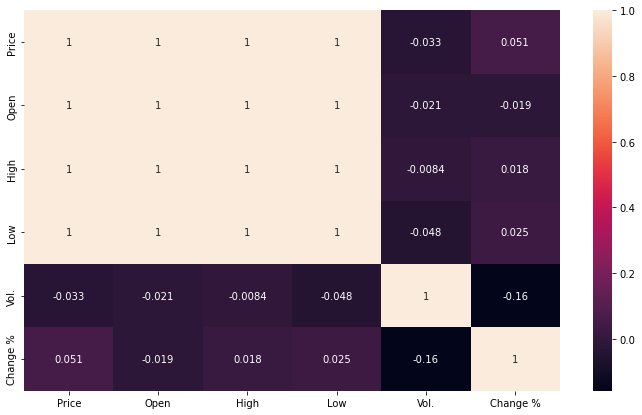

In [10]:
corr = data.corr()
plt.figure(figsize = (12, 7))
sns.heatmap(corr, annot = True)

In [11]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        4
Change %    0
dtype: int64

In [12]:
data.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object

In [13]:
data = data.fillna(data["Vol."].mean())

In [14]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [15]:
data.set_index("Date", inplace = True)

In [16]:
z = np.abs(stats.zscore(data))
z

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,1.452791,1.437833,1.442917,1.472415,0.200489,0.180814
2019-12-30,1.470180,1.501553,1.444887,1.490487,0.397844,0.377257
2019-12-27,1.510422,1.438330,1.440455,1.506550,0.647069,0.668327
2019-12-26,1.430931,1.460732,1.411403,1.483459,0.593935,0.415278
2019-12-24,1.475148,1.510016,1.435039,1.501029,0.711589,0.250519
...,...,...,...,...,...,...
2015-01-06,0.995847,0.937533,0.973758,0.994553,0.146148,1.353134
2015-01-05,0.893104,0.863757,0.863851,0.886425,0.180306,0.573700
2015-01-02,0.850477,0.957346,0.890639,0.900180,0.219465,1.213297


In [17]:
(np.abs(stats.zscore(data)) > 3).sum()

Price        0
Open         0
High         0
Low          0
Vol.        15
Change %    12
dtype: int64

In [18]:
data_clean = data[((np.abs(stats.zscore(data)))<3).all(axis=1)]
data_clean

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-12-31,731.15,729.70,737.75,725.45,6.93,-0.24
2019-12-30,732.90,736.10,737.95,727.25,5.37,-0.55
2019-12-27,736.95,729.75,737.50,728.85,3.40,1.10
2019-12-26,728.95,732.00,734.55,726.55,3.82,-0.61
2019-12-24,733.40,736.95,736.95,728.30,2.89,-0.35
...,...,...,...,...,...,...
2015-01-06,484.72,491.12,492.36,479.73,9.67,-2.09
2015-01-05,495.06,498.53,503.52,490.50,9.94,-0.86
2015-01-02,499.35,489.13,500.80,489.13,6.78,1.96


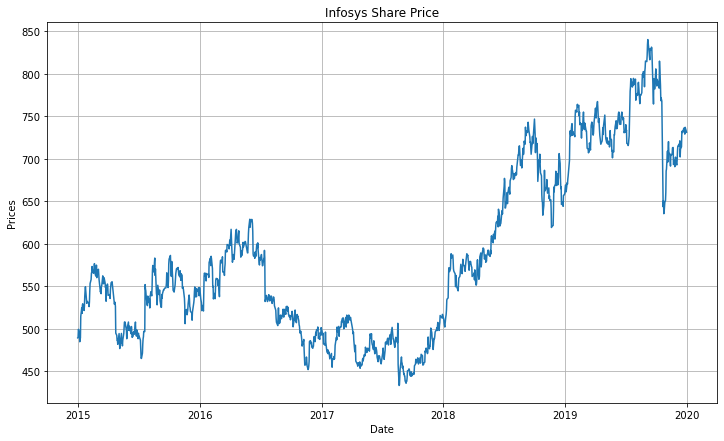

In [19]:
plt.figure(figsize=(12,7))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Prices")
plt.plot(data["Price"])
plt.title("Infosys Share Price")
plt.show()

<AxesSubplot:ylabel='Density'>

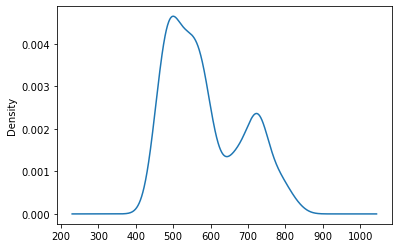

In [20]:
df = data["Price"]
df.plot(kind = "kde")

### SelectKBest

In [21]:
open_price_crosstab = pd.crosstab(data["Open"], data["Price"], margins = True)
open_price_crosstab

Price,433.27,434.27,435.9,438.41,438.56,438.68,442.7,442.9,444.16,444.29,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Open,,,,,,,,,,,,,,,,,,,,,
436.55,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
437.81,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438.78,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439.28,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
441.71,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
832.05,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
836.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [22]:
high_price_crosstab = pd.crosstab(data["High"], data["Price"], margins = True)
high_price_crosstab

Price,433.27,434.27,435.9,438.41,438.56,438.68,442.7,442.9,444.16,444.29,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
High,,,,,,,,,,,,,,,,,,,,,
440.32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440.39,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
442.4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
444.78,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
445.01,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
837.95,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
840.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [23]:
low_price_crosstab = pd.crosstab(data["Low"], data["Price"], margins = True)
low_price_crosstab

Price,433.27,434.27,435.9,438.41,438.56,438.68,442.7,442.9,444.16,444.29,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Low,,,,,,,,,,,,,,,,,,,,,
426.63,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
431.59,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
433.4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
433.52,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
435.95,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
826.65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
827.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [24]:
vol_price_crosstab = pd.crosstab(data["Vol."], data["Price"], margins = True)
vol_price_crosstab

Price,433.27,434.27,435.9,438.41,438.56,438.68,442.7,442.9,444.16,444.29,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Vol.,,,,,,,,,,,,,,,,,,,,,
1.09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61.48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
90.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
90.41,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
change_price_crosstab = pd.crosstab(data["Change %"], data["Price"], margins = True)
change_price_crosstab

Price,433.27,434.27,435.9,438.41,438.56,438.68,442.7,442.9,444.16,444.29,...,820.7,821.3,827.7,829.1,829.3,829.85,831.25,834.05,840.15,All
Change %,,,,,,,,,,,,,,,,,,,,,
-16.19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-9.56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-8.82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-5.98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-5.4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5.63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7.24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
shuffled_data = shuffle(data, random_state = 125)

#X = Independent Variable
target_col = "Price"
X = data.drop("Price", axis = 1)

#y = Dependent Variable
y = shuffled_data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 125)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(48, 5) (13, 5) (48,) (13,)


In [64]:
X_n = SelectKBest(f_classif, k = 1).fit_transform(X, y)
X_n.shape

#Another method (Giving Same Results)

X_new = SelectKBest(f_classif, k = 1).fit(X_train, y_train)
X_train.columns[X_new.get_support()]

Index(['Change %'], dtype='object')

In [65]:
pd.crosstab(np.squeeze(X_n), np.squeeze(y))

Price,489.27,8452.58,9192.70,9205.01,9367.79,9682.46,9862.99,9889.58,9913.45,9922.37,...,14619.50,14628.47,14681.05,14947.55,15134.00,15440.60,15743.70,15848.25,16258.61,17509.50
row_0,,,,,,,,,,,,,,,,,,,,,
-14.32,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
-12.99,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
-10.46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-9.10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-8.27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10.11,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


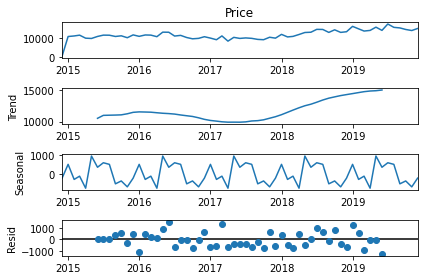

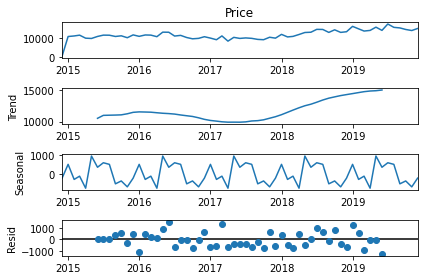

In [66]:
seasonal_decompose(data["Price"], model = "additive", period = 12).plot()

In [67]:
data = data.groupby("Date").sum()

In [68]:
data = data.resample(rule = 'MS').sum()

In [69]:
data.head(10)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2014-12-01,489.27,484.92,490.86,483.68,6.97,0.32
2015-01-01,10891.83,10877.48,10994.86,10734.11,232.47,8.54
2015-02-01,11187.46,11161.40,11291.45,11057.19,137.78,7.12
2015-03-01,11609.26,11646.91,11766.87,11497.06,142.00,-3.26
2015-04-01,10012.38,10094.22,10133.63,9907.78,218.63,-12.99
2015-05-01,9862.99,9863.94,9967.64,9754.00,164.07,4.31
2015-06-01,10926.89,10975.84,11072.51,10839.29,139.76,-2.56
2015-07-01,11624.12,11615.26,11760.79,11466.62,177.11,9.75
2015-08-01,11582.89,11612.88,11767.43,11377.47,175.82,2.04


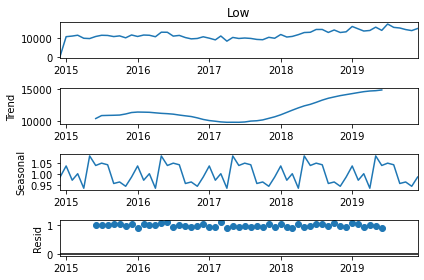

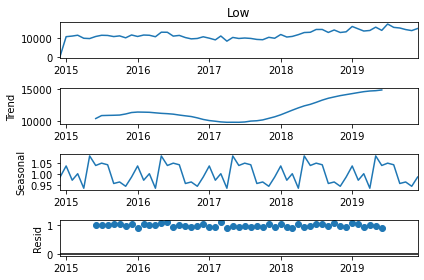

In [70]:
result = seasonal_decompose(data["Low"], model = "multiplicable", period = 12)
result.plot()

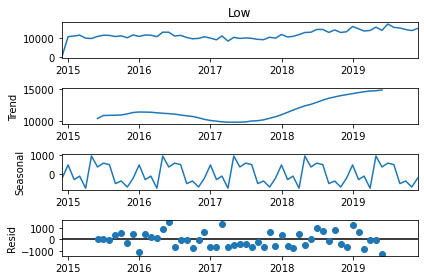

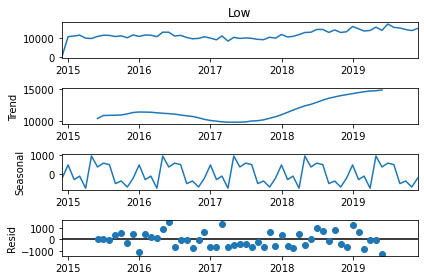

In [71]:
result = seasonal_decompose(data["Low"], model = "additive", period = 12)
result.plot()

In [72]:
train_size = int(len(data) * 0.7)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [80]:
model = ExponentialSmoothing(train["Low"], trend = "add", seasonal = "add", seasonal_periods = 12).fit()

/Users/_fangkhai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [81]:
test_pred = model.forecast(19)

In [82]:
test_pred

2018-06-01    12359.916568
2018-07-01    11565.526758
2018-08-01    11769.352341
2018-09-01    11001.526480
2018-10-01    10907.948479
2018-11-01    10614.900918
2018-12-01    11431.574638
2019-01-01    11270.237591
2019-02-01    11224.921479
2019-03-01    12206.972304
2019-04-01    10665.515968
2019-05-01    12721.153697
2019-06-01    12750.300349
2019-07-01    11955.910539
2019-08-01    12159.736122
2019-09-01    11391.910260
2019-10-01    11298.332260
2019-11-01    11005.284699
2019-12-01    11821.958419
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Date'>

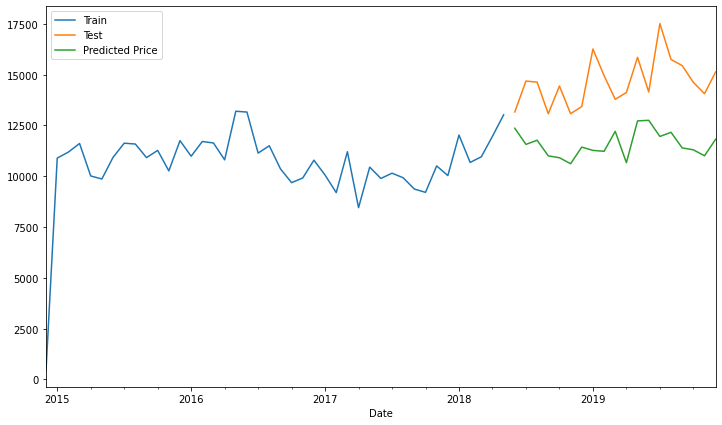

In [83]:
train["Price"].plot(legend = True, label = "Train", figsize = (12, 7))
test["Price"].plot(legend = True, label = "Test")
test_pred.plot(legend = True, label = "Predicted Price")

In [84]:
mape = np.mean(np.abs((test["Price"] - test_pred) / test["Price"])) * 100
mape

20.46935466389776

In [85]:
mae = mean_absolute_error(test["Price"], test_pred)
mae

3050.8800069083263

In [86]:
mse = mean_squared_error(test["Price"], test_pred)
rmse = math.sqrt(mse)
rmse

3257.144677599269

### Final Model Built Based On Entire DataSet (Extra)

In [ ]:
# final_model = ExponentialSmoothing(data["Price"], trend = "add", seasonal = "mul", seasonal_periods = 24).fit()

In [ ]:
# pred = final_model.forecast(5)

In [ ]:
# pred

In [ ]:
# data["Price"].plot(legend = True, label = "Price", figsize = (12, 7))
# pred.plot(legend = True, label = "Predicted Price")